In [1]:
import numpy as np
import pandas as pd

from scipy.io.wavfile import read
from scipy.signal import stft, istft

import matplotlib.pyplot as plt

In [3]:
music = read('music.wav')[1]
sr, noise1 = read('noise1.wav')
sr, noise2 = read('noise2.wav')
sr, noise3 = read('noise3.wav')

In [89]:
NOISE = noise3

In [127]:
def give_factor(snr, noise):
    sound_norm = np.linalg.norm(music)
    noise_norm = np.linalg.norm(noise)
    factor = (sound_norm / noise_norm) * (np.exp(-snr / 20))
    return factor

def add_noise(snr, noise):
    factor = give_factor(snr, noise)
    noise = noise * factor
    return music + noise

def plot_stft(f, t, z, title=None):
    plt.figure(figsize=(20, 10))
    plt.imshow(z, aspect='auto', origin='lower')
    plt.xticks(np.arange(len(t))[::30], t[::30])
    plt.yticks(np.arange(len(f))[::30], f[::30])
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title(title)
    plt.show()

In [128]:
noisy_music_1 = add_noise(10, noise1)
noisy_music_2 = add_noise(10, noise2)
noisy_music_3 = add_noise(10, noise3)

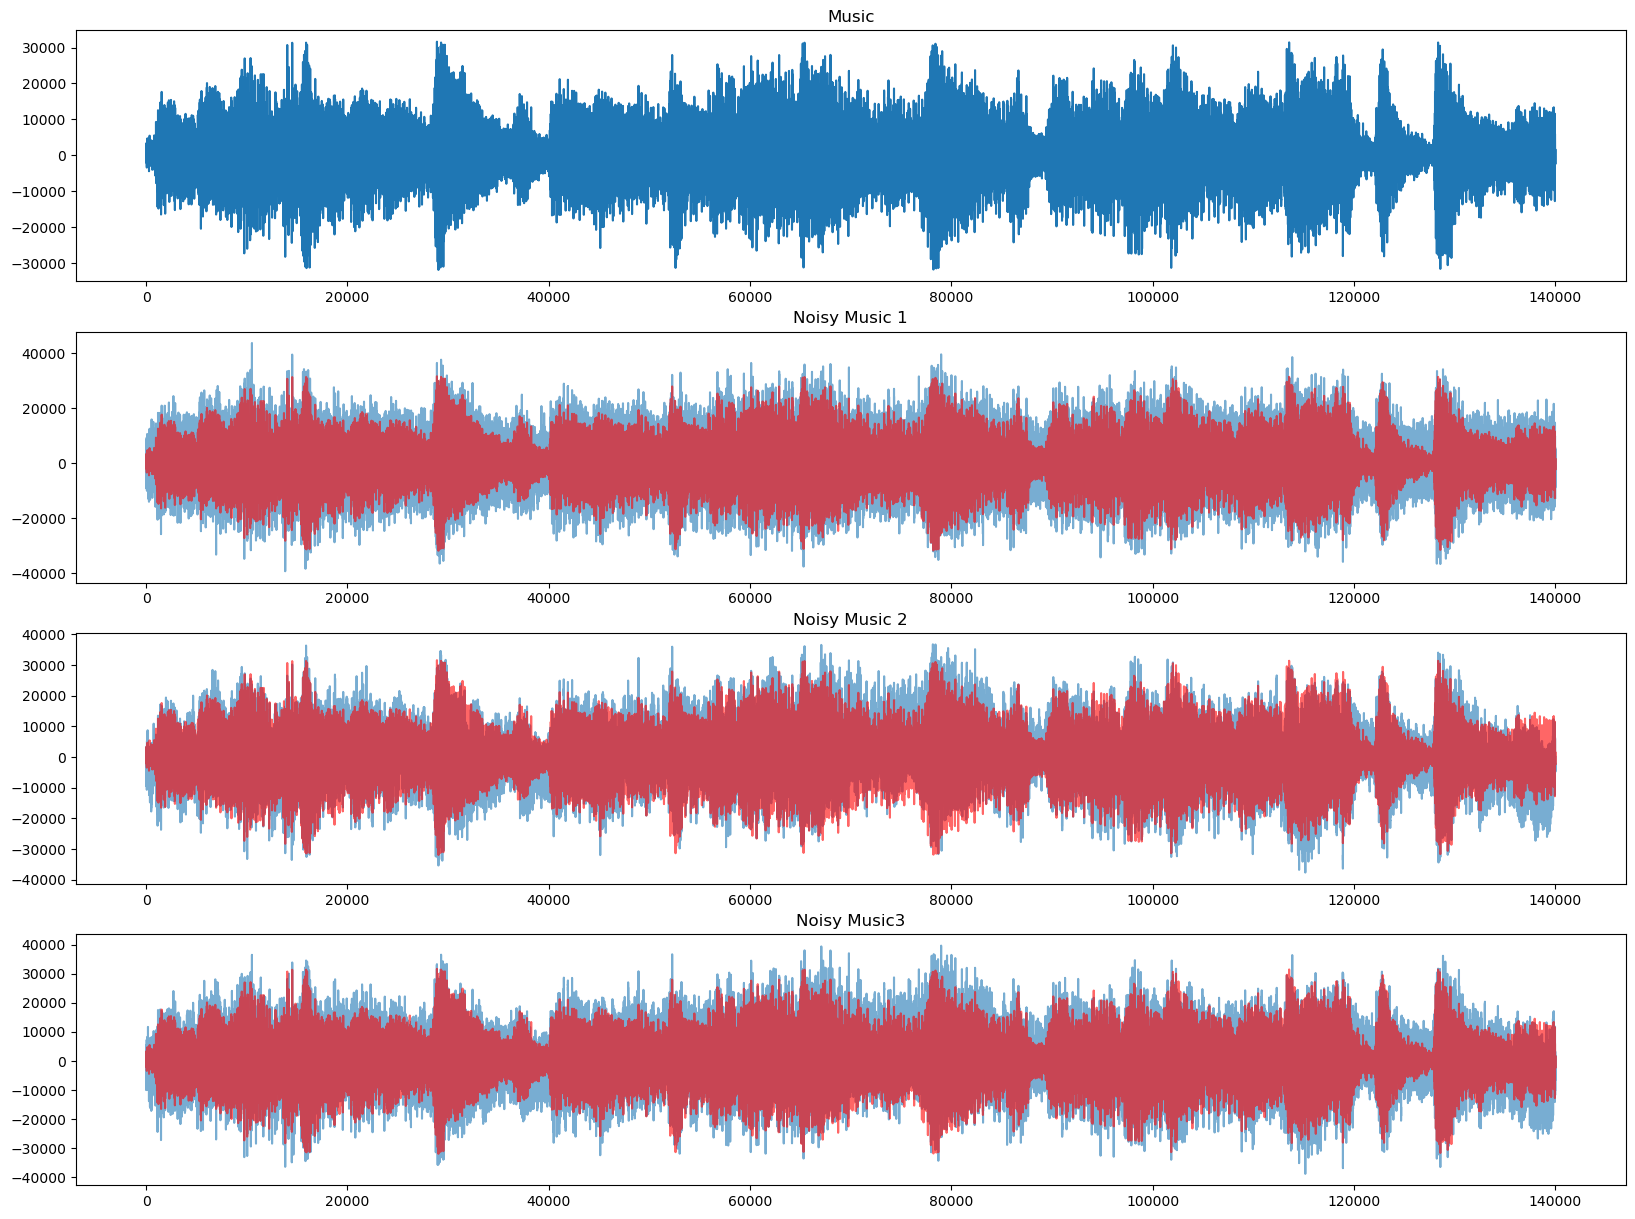

In [129]:
plt.figure(figsize=(20, 15))

plt.subplot(4, 1, 1)
plt.plot(music)
plt.title('Music')

plt.subplot(4, 1, 2)
plt.plot(noisy_music_1, alpha=0.6)
plt.plot(music, alpha=0.6, color='red')
plt.title('Noisy Music 1')

plt.subplot(4, 1, 3)
plt.plot(noisy_music_2, alpha=0.6)
plt.plot(music, alpha=0.6, color='red')
plt.title('Noisy Music 2')

plt.subplot(4, 1, 4)
plt.plot(noisy_music_3, alpha=0.6)
plt.plot(music, alpha=0.6, color='red')
plt.title('Noisy Music3')

plt.show()

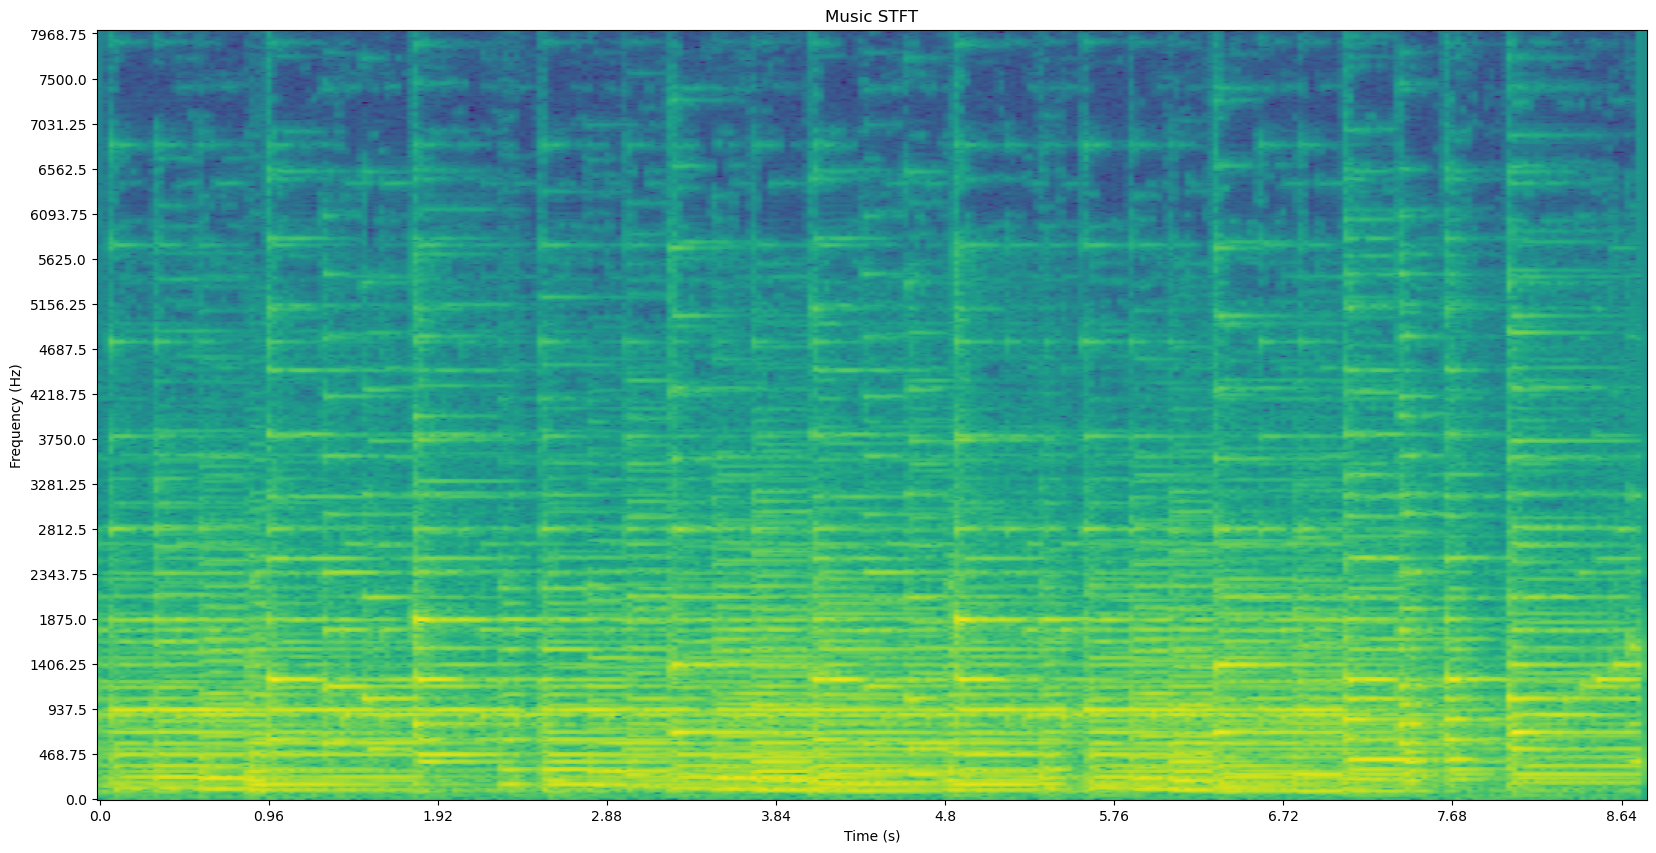

In [130]:
music_f, music_t, music_z  = stft(music, fs=sr, nperseg=1024, noverlap=512)
plot_stft(music_f, music_t, np.log(np.abs(music_z)), 'Music STFT')

In [141]:
_, _, noisy_musicz_1  = stft(noisy_music_1, fs=sr, nperseg=1024, noverlap=512)
_, _, noisy_musicz_2  = stft(noisy_music_2, fs=sr, nperseg=1024, noverlap=512)
_, _, noisy_musicz_3  = stft(noisy_music_3, fs=sr, nperseg=1024, noverlap=512)

In [ ]:
plot_stft(noisy_music_f, noisy_music_t, np.log(np.abs(noisy_music_z)), 'Noisy Music STFT')

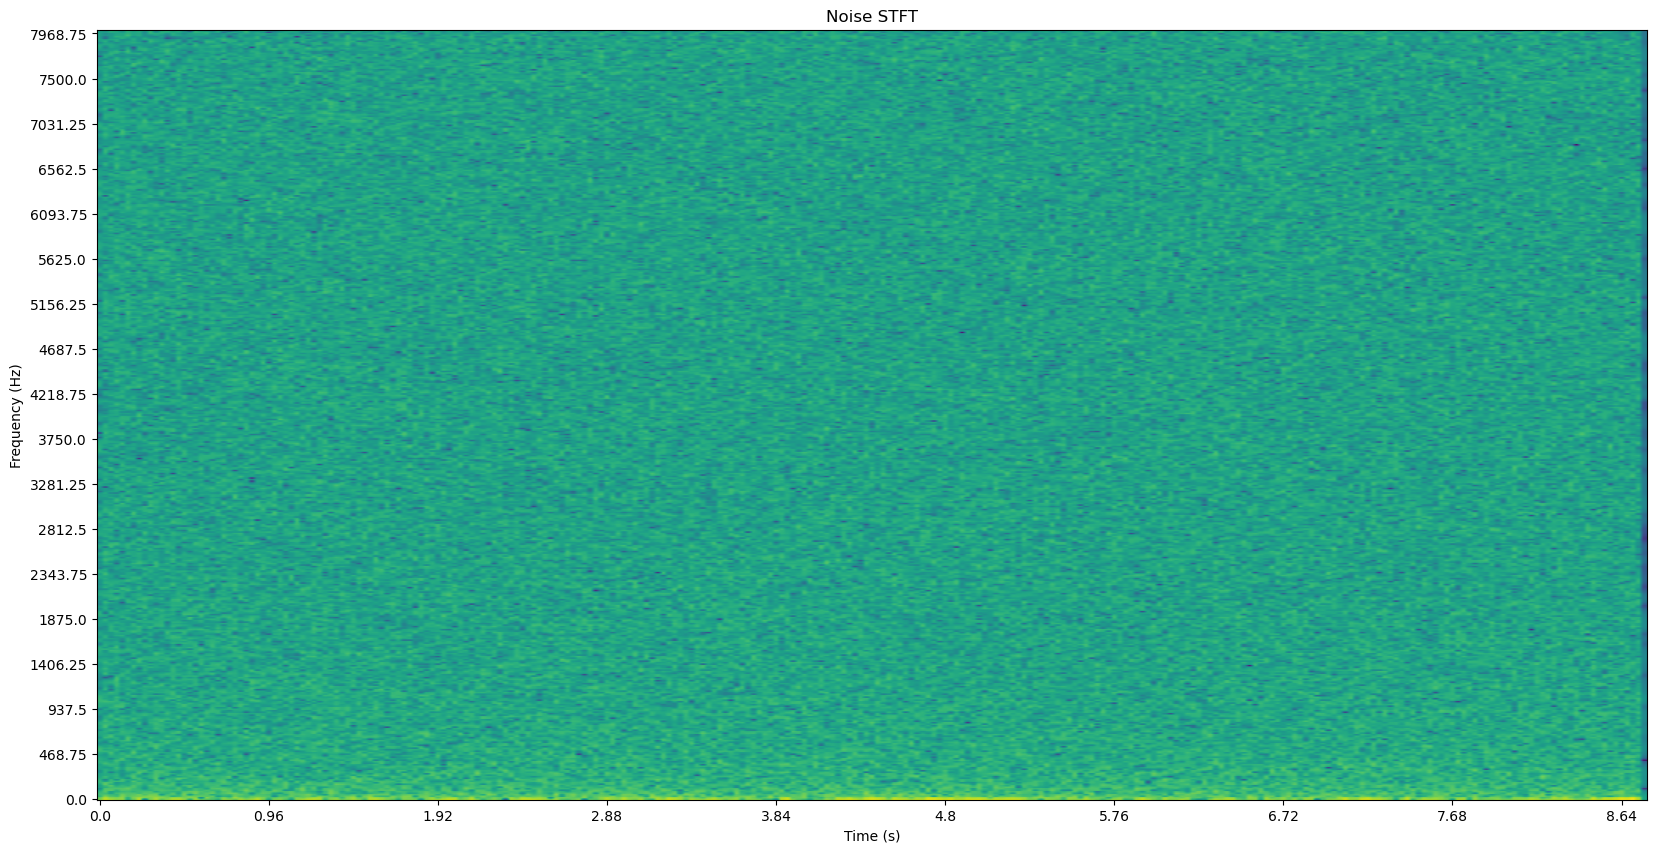

In [132]:
noise_f, noise_t, noise_z  = stft(NOISE, fs=sr, nperseg=1024, noverlap=512)
plot_stft(noise_f, noise_t, np.log(np.abs(noise_z)), 'Noise STFT')

In [133]:
def spectral_substraction(noisy_spectrum, noise_spectrum, lamda=1):
    ratio = np.abs(noise_spectrum)**2/np.abs(noisy_spectrum)**2
    factor = np.maximum(0, 1-lamda**2*ratio)
    return factor * noisy_spectrum

In [134]:
def full_spectral_substraction(noisy_spectrum, noise_spectrum, lamda=1, alpha=2, beta=1, gamma=0):
    # Mask 
    mask = np.abs(noisy_spectrum)**alpha > lamda**alpha * np.abs(noise_spectrum)**alpha

    # Building the positive case in steps to avoid mistakes
    ratio = np.abs(noise_spectrum)**alpha/np.abs(noisy_spectrum)**alpha
    factor = (1-lamda**alpha*ratio)**beta
    positive = noise_spectrum * factor

    # Negative case
    negative = gamma * noisy_spectrum / np.abs(noisy_spectrum) * np.abs(noise_spectrum)

    return np.where(mask, positive, negative)

In [135]:
denoised_spectrum = spectral_substraction(noisy_music_z, noise_z, lamda=1.2)

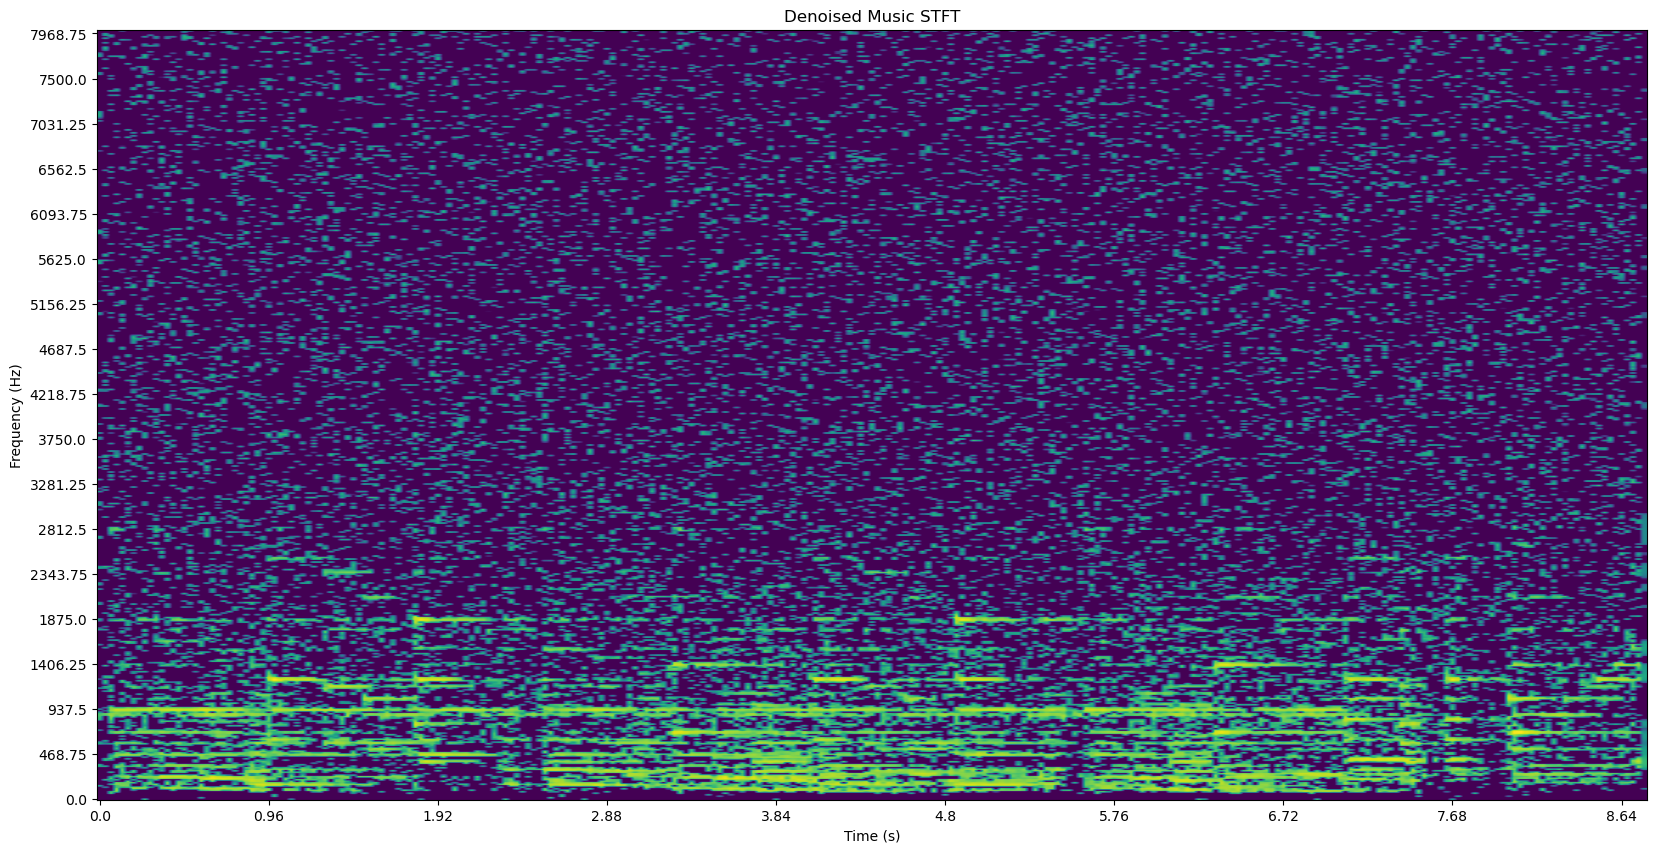

In [137]:
plot_stft(noisy_music_f, noisy_music_t, np.log(np.abs(denoised_spectrum)+0.1), 'Denoised Music STFT')

In [138]:
_, denoised_music = istft(denoised_spectrum, fs=sr, nperseg=1024, noverlap=512)

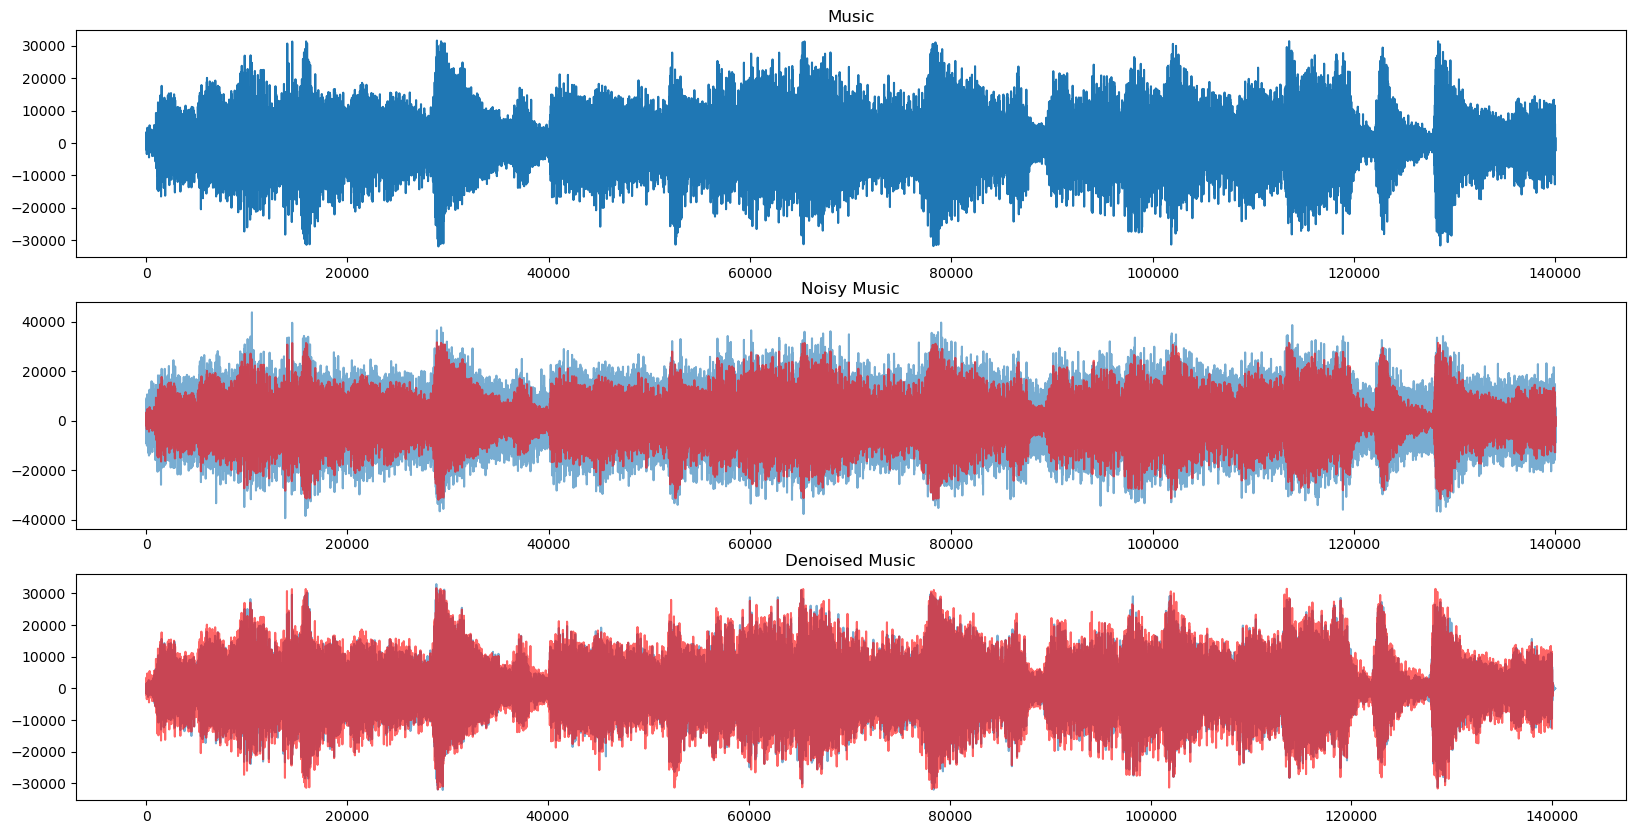

In [140]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
plt.plot(music)
plt.title('Music')

plt.subplot(3, 1, 2)
plt.plot(noisy_music_1, alpha=0.6)
plt.plot(music, alpha=0.6, color='red')
plt.title('Noisy Music')

plt.subplot(3, 1, 3)
plt.plot(denoised_music, alpha=0.6)
plt.plot(music, alpha=0.6, color='red')
plt.title('Denoised Music')

plt.show()

## Parameter exploration

In [ ]:
def perform_denoising()